In [45]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest' 
#Original Sandbox Environment: 'https://sandbox-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '321fafa2-d98c-41e5-8fe1-5757ff4811a1',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)
#Increase IOPub data rate: "jupyter notebook --NotebookApp.iopub_data_rate_limit=1e10"

{'status': {'timestamp': '2023-10-01T00:30:13.442Z', 'error_code': 0, 'error_message': None, 'elapsed': 49, 'credit_count': 1, 'notice': None, 'total_count': 9034}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 10484, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'para

In [46]:
type(data)

dict

In [47]:
import pandas as pd

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)


df = pd.json_normalize(data['data'])
df['timestamp'] = pd.Timestamp('now')
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,10484,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.000000,19500487.000000,19500487.000000,False,NaN,1,NaN,NaN,None,2023-10-01T00:28:00.000Z,26976.318755,5307389491.561717,-48.478400,-0.083848,0.254545,1.507306,3.675366,-9.430849,-12.001889,526051353193.350281,48.824100,566502693858.890015,None,2023-10-01T00:28:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-10-01 06:30:11.179567
1,1027,Ethereum,ETH,ethereum,7463,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120237298.635550,120237298.635550,True,NaN,2,NaN,NaN,None,2023-10-01T00:28:00.000Z,1673.393698,3137330099.712827,-42.821900,0.026094,0.299784,5.000674,1.325465,-10.666839,-13.676659,201204337754.618774,18.675200,201204337754.619995,None,2023-10-01T00:28:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-10-01 06:30:11.179567
2,825,Tether USDt,USDT,tether,62996,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,83255047972.359543,86425711834.227020,True,NaN,3,NaN,NaN,None,2023-10-01T00:28:00.000Z,1.000188,28031686192.144253,-17.141400,-0.005497,0.015841,0.008922,0.026373,0.058386,0.017899,83270721864.959976,7.727800,86441982647.330002,None,2023-10-01T00:28:00.000Z,1027.000000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-10-01 06:30:11.179567
3,1839,BNB,BNB,bnb,1648,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,153846630.828475,153846630.828475,False,NaN,4,NaN,NaN,None,2023-10-01T00:28:00.000Z,214.745738,243175958.193326,-27.457700,-0.160515,-0.224625,1.988094,-1.364526,-13.587223,-12.936600,33037908241.767612,3.066000,33037908241.770000,None,2023-10-01T00:28:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-10-01 06:30:11.179567
4,52,XRP,XRP,xrp,1103,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",100000000000.000000,53312364216.000000,99988397127.000000,False,NaN,5,NaN,NaN,None,2023-10-01T00:28:00.000Z,0.515582,520283511.502809,-69.937500,-0.153378,-0.295920,1.267808,0.957111,-26.943807,6.591117,27486891279.755604,2.551300,51558192333.000000,None,2023-10-01T00:28:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-10-01 06:30:11.179567
5,3408,USDC,USDC,usd-coin,14269,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,25103853492.003349,25103853492.003349,False,NaN,6,NaN,NaN,None,2023-10-01T00:28:00.000Z,1.000074,1364149577.171948,-43.671000,-0.001415,-0.002742,0.006050,0.005515,-0.004969,0.001484,25105705742.732380,2.329900,25105705742.730000,None,2023-10-01T00:28:00.000Z,1027.000000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-10-01 06:30:11.179567
6,2010,Cardano,ADA,cardano,941,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",45000000000.000000,35132580521.091003,36213906237.638000,False,NaN,7,NaN,NaN,None,2023-10-01T00:28:00.000Z,0.254270,107480098.215191,-36.024200,0.080173,1.896257,3.399636,-0.928118,-18.236343,-13.074162,8933158292.481346,0.829000,11442146212.980000,None,2023-10-01T00:28:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-10-01 06:30:11.179567
7,5426,Solana,SOL,solana,533,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,412986813.978013,558809712.194985,True,NaN,8,NaN,NaN,None,2023-10-01T00:28:00.000Z,21.334001,330963028.505881,54.450100,-0.453412,5.151068,9.17

In [48]:

def api_runner():
    global df    
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest' 
    #Original Sandbox Environment: 'https://sandbox-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'15',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': '321fafa2-d98c-41e5-8fe1-5757ff4811a1',
    }

    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)

    
#Increase IOPub data rate: "jupyter notebook --NotebookApp.iopub_data_rate_limit=1e10"

    df = pd.json_normalize(data['data'])
    df['timestamp'] = pd.Timestamp('now')
    df
    
    #df = pd.concat([df, df2])
    #df = df.append(df2)
    
    if not os.path.isfile(r'I:\2023\33. Data Analytics ProjectFiles\Py\API\API.csv'):
        df.to_csv(r'I:\2023\33. Data Analytics ProjectFiles\Py\API\API.csv', header = 'column_names')
    else:
        df.to_csv(r'I:\2023\33. Data Analytics ProjectFiles\Py\API\API.csv', mode = 'a', header= False)
        


In [49]:
import os
from time import time
from time import sleep

for i in range (333):
    api_runner()
    print("API Runner Completed")
    sleep(60)
exit()



{'status': {'timestamp': '2023-10-01T00:30:14.248Z', 'error_code': 0, 'error_message': None, 'elapsed': 8, 'credit_count': 1, 'notice': None, 'total_count': 9034}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 10484, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'parad

KeyboardInterrupt: 

In [50]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,10484,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.000000,19500487.000000,19500487.000000,False,NaN,1,NaN,NaN,None,2023-10-01T00:35:00.000Z,26977.536244,5310910352.098475,-48.316800,-0.014046,0.251130,1.509450,3.663603,-9.305363,-11.967195,526075094814.248962,48.845100,566528261119.800049,None,2023-10-01T00:35:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-10-01 06:37:17.568696
1,1027,Ethereum,ETH,ethereum,7463,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120237298.635550,120237298.635550,True,NaN,2,NaN,NaN,None,2023-10-01T00:35:00.000Z,1673.214319,3138595759.139680,-42.664200,0.108338,0.230334,4.991288,1.276513,-10.525147,-13.684128,201182769724.646942,18.675000,201182769724.649994,None,2023-10-01T00:35:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-10-01 06:37:17.568696
2,825,Tether USDt,USDT,tether,62997,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,83255047972.359543,86425711834.227020,True,NaN,3,NaN,NaN,None,2023-10-01T00:35:00.000Z,1.000251,28085958823.828991,-16.998000,-0.002904,0.027110,0.007561,0.039062,0.061657,0.012811,83275945849.666122,7.731100,86447405580.929993,None,2023-10-01T00:35:00.000Z,1027.000000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-10-01 06:37:17.568696
3,1839,BNB,BNB,bnb,1648,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,153846630.828475,153846630.828475,False,NaN,4,NaN,NaN,None,2023-10-01T00:35:00.000Z,214.709839,242739317.186983,-27.622900,-0.128186,-0.305873,1.975104,-1.444285,-13.417062,-12.896855,33032385392.732277,3.066600,33032385392.730000,None,2023-10-01T00:35:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-10-01 06:37:17.568696
4,52,XRP,XRP,xrp,1103,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",100000000000.000000,53312364216.000000,99988397127.000000,False,NaN,5,NaN,NaN,None,2023-10-01T00:35:00.000Z,0.515225,517547258.472882,-70.154300,-0.211732,-0.420062,1.186354,0.890194,-26.898770,6.633739,27467866228.793533,2.549700,51522506331.750000,None,2023-10-01T00:35:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-10-01 06:37:17.568696
5,3408,USDC,USDC,usd-coin,14269,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,25103853492.003349,25103853492.003349,False,NaN,6,NaN,NaN,None,2023-10-01T00:35:00.000Z,1.000111,1359573530.557921,-43.817900,-0.001968,0.004381,-0.003530,0.004816,0.001004,-0.007247,25106648224.182514,2.330800,25106648224.180000,None,2023-10-01T00:35:00.000Z,1027.000000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-10-01 06:37:17.568696
6,2010,Cardano,ADA,cardano,941,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",45000000000.000000,35132580521.091003,36213906237.638000,False,NaN,7,NaN,NaN,None,2023-10-01T00:35:00.000Z,0.254098,107331318.036662,-36.235700,0.063072,1.673250,3.267406,-1.067644,-18.124064,-12.945501,8927122335.524092,0.828800,11434414982.910000,None,2023-10-01T00:35:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-10-01 06:37:17.568696
7,5426,Solana,SOL,solana,533,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,412986813.978013,558809712.194985,True,NaN,8,NaN,NaN,None,2023-10-01T00:35:00.000Z,21.266997,333832012.218010,56.085000,-0.687441,4.643684,8.78

In [51]:
import pandas as pd
df72 = pd.read_csv(r'I:\2023\33. Data Analytics ProjectFiles\Py\API\API.csv')
df72

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,0,1,Bitcoin,BTC,bitcoin,10483,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",21000000.000000,19499425.000000,19499425.000000,False,NaN,1,NaN,NaN,NaN,2023-09-29T19:57:00.000Z,26927.553655,10954783989.617306,-20.409700,0.034546,-0.666087,1.396309,-1.207190,-7.771072,-12.035583,525071812936.439209,48.814500,565478626762.849976,NaN,2023-09-29T19:57:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-09-30 01:59:22.135701
1,1,1027,Ethereum,ETH,ethereum,7461,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,120236031.105535,120236031.105535,True,NaN,2,NaN,NaN,NaN,2023-09-29T19:57:00.000Z,1665.157045,5747634181.834044,-11.409500,-0.073650,0.452952,4.489140,-2.270870,-10.428246,-13.408874,200211874204.834869,18.613100,200211874204.829987,NaN,2023-09-29T19:57:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-09-30 01:59:22.135701
2,2,825,Tether USDt,USDT,tether,62972,2015-02-25T00:00:00.000Z,"['payments', 'stablecoin', 'asset-backed-stabl...",NaN,83276573705.229889,86425711834.253860,True,NaN,3,NaN,NaN,NaN,2023-09-29T19:57:00.000Z,0.999947,32017601896.417290,37.866000,-0.006055,-0.024287,0.000061,0.006006,-0.003690,-0.020310,83272170368.234253,7.741600,86421141983.250000,NaN,2023-09-29T19:57:00.000Z,1027.000000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-09-30 01:59:22.135701
3,3,1839,BNB,BNB,bnb,1648,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",NaN,153846751.690494,153846751.690494,False,NaN,4,NaN,NaN,NaN,2023-09-29T19:57:00.000Z,215.725589,339965729.450168,-6.492300,0.055281,0.270403,2.427905,-3.286353,-10.710837,-12.512128,33188681078.994759,3.085100,33188681078.990002,NaN,2023-09-29T19:57:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-09-30 01:59:22.135701
4,4,52,XRP,XRP,xrp,1103,2013-08-04T00:00:00.000Z,"['medium-of-exchange', 'enterprise-solutions',...",100000000000.000000,53312364216.000000,99988397127.000000,False,NaN,5,NaN,NaN,NaN,2023-09-29T19:57:00.000Z,0.532013,1562086847.829449,90.033800,-0.340450,4.689734,3.354803,0.866738,-25.618752,12.220813,28362883842.377201,2.636800,53201324419.720001,NaN,2023-09-29T19:57:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-09-30 01:59:22.135701
5,5,3408,USDC,USDC,usd-coin,14266,2018-10-08T00:00:00.000Z,"['medium-of-exchange', 'stablecoin', 'asset-ba...",NaN,25223443915.502037,25223443915.502037,False,NaN,6,NaN,NaN,NaN,2023-09-29T19:57:00.000Z,1.000086,2617386255.998088,-13.707400,-0.005282,-0.049262,0.011639,0.020824,-0.007123,-0.011713,25225602606.110031,2.345200,25225602606.110001,NaN,2023-09-29T19:57:00.000Z,1027.000000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-09-30 01:59:22.135701
6,6,74,Dogecoin,DOGE,dogecoin,802,2013-12-15T00:00:00.000Z,"['mineable', 'pow', 'scrypt', 'medium-of-excha...",NaN,141208816383.705200,141208816383.705200,True,NaN,7,NaN,NaN,NaN,2023-09-29T19:57:00.000Z,0.062008,138675720.792330,-2.913800,0.148971,0.939144,0.930900,-5.190542,-20.629861,-9.197148,8756132084.546179,0.813900,8756132084.549999,NaN,2023-09-29T19:57:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-09-30 01:59:22.135701
7,7,2010,Cardano,ADA,cardano,940,2017-10-01T00:00:00.000Z,"['dpos', 'pos', 'platform', 'research', 'smart...",45000000000.000000,35128438968.649002,36213906237.638000,False,NaN,8,NaN,NaN,NaN,2023-09-29T19:57:00.000Z,0.249085,159268936.109101,21.681900,-0

In [52]:
pd.set_option('display.float_format',lambda x: '%5f' %x)

In [53]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,10484,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.000000,19500487.000000,19500487.000000,False,NaN,1,NaN,NaN,None,2023-10-01T00:35:00.000Z,26977.536244,5310910352.098475,-48.316800,-0.014046,0.251130,1.509450,3.663603,-9.305363,-11.967195,526075094814.248962,48.845100,566528261119.800049,None,2023-10-01T00:35:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-10-01 06:37:17.568696
1,1027,Ethereum,ETH,ethereum,7463,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120237298.635550,120237298.635550,True,NaN,2,NaN,NaN,None,2023-10-01T00:35:00.000Z,1673.214319,3138595759.139680,-42.664200,0.108338,0.230334,4.991288,1.276513,-10.525147,-13.684128,201182769724.646942,18.675000,201182769724.649994,None,2023-10-01T00:35:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-10-01 06:37:17.568696
2,825,Tether USDt,USDT,tether,62997,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,83255047972.359543,86425711834.227020,True,NaN,3,NaN,NaN,None,2023-10-01T00:35:00.000Z,1.000251,28085958823.828991,-16.998000,-0.002904,0.027110,0.007561,0.039062,0.061657,0.012811,83275945849.666122,7.731100,86447405580.929993,None,2023-10-01T00:35:00.000Z,1027.000000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-10-01 06:37:17.568696
3,1839,BNB,BNB,bnb,1648,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,153846630.828475,153846630.828475,False,NaN,4,NaN,NaN,None,2023-10-01T00:35:00.000Z,214.709839,242739317.186983,-27.622900,-0.128186,-0.305873,1.975104,-1.444285,-13.417062,-12.896855,33032385392.732277,3.066600,33032385392.730000,None,2023-10-01T00:35:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-10-01 06:37:17.568696
4,52,XRP,XRP,xrp,1103,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",100000000000.000000,53312364216.000000,99988397127.000000,False,NaN,5,NaN,NaN,None,2023-10-01T00:35:00.000Z,0.515225,517547258.472882,-70.154300,-0.211732,-0.420062,1.186354,0.890194,-26.898770,6.633739,27467866228.793533,2.549700,51522506331.750000,None,2023-10-01T00:35:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-10-01 06:37:17.568696
5,3408,USDC,USDC,usd-coin,14269,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,25103853492.003349,25103853492.003349,False,NaN,6,NaN,NaN,None,2023-10-01T00:35:00.000Z,1.000111,1359573530.557921,-43.817900,-0.001968,0.004381,-0.003530,0.004816,0.001004,-0.007247,25106648224.182514,2.330800,25106648224.180000,None,2023-10-01T00:35:00.000Z,1027.000000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-10-01 06:37:17.568696
6,2010,Cardano,ADA,cardano,941,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",45000000000.000000,35132580521.091003,36213906237.638000,False,NaN,7,NaN,NaN,None,2023-10-01T00:35:00.000Z,0.254098,107331318.036662,-36.235700,0.063072,1.673250,3.267406,-1.067644,-18.124064,-12.945501,8927122335.524092,0.828800,11434414982.910000,None,2023-10-01T00:35:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-10-01 06:37:17.568696
7,5426,Solana,SOL,solana,533,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,412986813.978013,558809712.194985,True,NaN,8,NaN,NaN,None,2023-10-01T00:35:00.000Z,21.266997,333832012.218010,56.085000,-0.687441,4.643684,8.78

In [54]:
df3=df.groupby('name', sort=False)[['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d']].mean()
df3

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,-0.014046,0.251130,1.509450,3.663603,-9.305363,-11.967195
Ethereum,0.108338,0.230334,4.991288,1.276513,-10.525147,-13.684128
Tether USDt,-0.002904,0.027110,0.007561,0.039062,0.061657,0.012811
BNB,-0.128186,-0.305873,1.975104,-1.444285,-13.417062,-12.896855
XRP,-0.211732,-0.420062,1.186354,0.890194,-26.898770,6.633739
USDC,-0.001968,0.004381,-0.003530,0.004816,0.001004,-0.007247
Cardano,0.063072,1.673250,3.267406,-1.067644,-18.124064,-12.945501
Solana,-0.687441,4.643684,8.780230,7.071215,-11.468973,9.849235
Dogecoin,-0.232546,-0.243760,0.913347,-3.073360,-20.298987,-8.573488


In [55]:
df4=df3.stack()
df4

name                                     
Bitcoin      quote.USD.percent_change_1h     -0.014046
             quote.USD.percent_change_24h     0.251130
             quote.USD.percent_change_7d      1.509450
             quote.USD.percent_change_30d     3.663603
             quote.USD.percent_change_60d    -9.305363
             quote.USD.percent_change_90d   -11.967195
Ethereum     quote.USD.percent_change_1h      0.108338
             quote.USD.percent_change_24h     0.230334
             quote.USD.percent_change_7d      4.991288
             quote.USD.percent_change_30d     1.276513
             quote.USD.percent_change_60d   -10.525147
             quote.USD.percent_change_90d   -13.684128
Tether USDt  quote.USD.percent_change_1h     -0.002904
             quote.USD.percent_change_24h     0.027110
             quote.USD.percent_change_7d      0.007561
             quote.USD.percent_change_30d     0.039062
             quote.USD.percent_change_60d     0.061657
             quote.USD.

In [56]:
type(df4)

pandas.core.series.Series

In [57]:
df5=df4.to_frame(name='values')
df5

values
name                                               
Bitcoin     quote.USD.percent_change_1h   -0.014046
            quote.USD.percent_change_24h   0.251130
            quote.USD.percent_change_7d    1.509450
            quote.USD.percent_change_30d   3.663603
            quote.USD.percent_change_60d  -9.305363
            quote.USD.percent_change_90d -11.967195
Ethereum    quote.USD.percent_change_1h    0.108338
            quote.USD.percent_change_24h   0.230334
            quote.USD.percent_change_7d    4.991288
            quote.USD.percent_change_30d   1.276513
            quote.USD.percent_change_60d -10.525147
            quote.USD.percent_change_90d -13.684128
Tether USDt quote.USD.percent_change_1h   -0.002904
            quote.USD.percent_change_24h   0.027110
            quote.USD.percent_change_7d    0.007561
            quote.USD.percent_change_30d   0.039062
            quote.USD.percent_change_60d   0.061657
            quote.USD.percent_change_90d   0.012811
BNB         quote.USD.percent_change_1h   -0.128186
            quote.USD.percent_change_24h  -0.305873
            quote.USD.percent_change_7d    1.975104
            quote.USD.percent_change_30d  -1.444285
            quote.USD.percent_change_60d -13.417062
            quote.USD.percent_change_90d -12.896855
XRP         quote.USD.percent_change_1h   -0.211732
            quote.USD.percent_change_24h  -0.420062
            quote.USD.percent_change_7d    1.186354
            quote.USD.percent_change_30d   0.890194
            quote.USD.percent_change_60d -26.898770
            quote.USD.percent_change_90d   6.633739
USDC        quote.USD.percent_change_1h   -0.001968
            quote.USD.percent_change_24h   0.004381
            quote.USD.percent_change_7d   -0.003530
            quote.USD.percent_change_30d   0.004816
            quote.USD.percent_change_60d   0.001004
            quote.USD.percent_change_90d  -0.007247
Cardano     quote.USD.percent_change_1h    0.063072
            quote.USD.percent_change_24h   1.673250
            quote.USD.percent_change_7d    3.267406
            quote.USD.percent_change_30d  -1.067644
            quote.USD.percent_change_60d -18.124064
            quote.USD.percent_change_90d -12.945501
Solana      quote.USD.percent_change_1h   -0.687441
            quote.USD.percent_change_24h   4.643684
            quote.USD.percent_change_7d    8.780230
            quote.USD.percent_change_30d   7.071215
            quote.USD.percent_change_60d -11.468973
            quote.USD.percent_change_90d   9.849235
Dogecoin    quote.USD.percent_change_1h   -0.232546
            quote.USD.percent_change_24h  -0.243760
            quote.USD.percent_change_7d    0.913347
            quote.USD.percent_change_30d  -3.073360
            quote.USD.percent_change_60d -20.298987
            quote.USD.percent_change_90d  -8.573488
TRON        quote.USD.percent_change_1h   -0.080522
            quote.USD.percent_change_24h  -0.670606
            quote.USD.percent_change_7d    5.983451
            quote.USD.percent_change_30d  15.227653
            quote.USD.percent_change_60d  12.962999
            quote.USD.percent_change_90d  16.731351
Toncoin     quote.USD.percent_change_1h   -0.123709
            quote.USD.percent_change_24h  -2.902176
            quote.USD.percent_change_7d   -8.030228
            quote.USD.percent_change_30d  20.717714
            quote.USD.percent_change_60d  75.673417
            quote.USD.percent_change_90d  47.106274
Dai         quote.USD.percent_change_1h   -0.001450
            quote.USD.percent_change_24h  -0.039104
            quote.USD.percent_change_7d   -0.041363
            quote.USD.percent_change_30d  -0.039555
            quote.USD.percent_change_60d  -0.036098
            quote.USD.percent_change_90d  -0.026632
Polkadot    quote.USD.percent_change_1h   -0.021000
            quote.USD.percent_change_24h   0.694316
            quote.USD.percent_change_7d    1.925261
            quote.USD.percent_change_30d 

In [58]:
df5.count()

values    90
dtype: int64

In [59]:
index=pd.Index(range(90))
df6=df5.reset_index()
df6

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,-0.014046
1,Bitcoin,quote.USD.percent_change_24h,0.251130
2,Bitcoin,quote.USD.percent_change_7d,1.509450
3,Bitcoin,quote.USD.percent_change_30d,3.663603
4,Bitcoin,quote.USD.percent_change_60d,-9.305363
5,Bitcoin,quote.USD.percent_change_90d,-11.967195
6,Ethereum,quote.USD.percent_change_1h,0.108338
7,Ethereum,quote.USD.percent_change_24h,0.230334
8,Ethereum,quote.USD.percent_change_7d,4.991288
9,Ethereum,quote.USD.percent_change_30d,1.276513


In [60]:
df7= df6.rename(columns={'level_1':'percent_change'})
df7

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,-0.014046
1,Bitcoin,quote.USD.percent_change_24h,0.251130
2,Bitcoin,quote.USD.percent_change_7d,1.509450
3,Bitcoin,quote.USD.percent_change_30d,3.663603
4,Bitcoin,quote.USD.percent_change_60d,-9.305363
5,Bitcoin,quote.USD.percent_change_90d,-11.967195
6,Ethereum,quote.USD.percent_change_1h,0.108338
7,Ethereum,quote.USD.percent_change_24h,0.230334
8,Ethereum,quote.USD.percent_change_7d,4.991288
9,Ethereum,quote.USD.percent_change_30d,1.276513


In [61]:
df7['percent_change']=df7['percent_change'].replace(['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d'],['1h','24h','7d','30d','60d','90d'])
df7

,name,percent_change,values
0,Bitcoin,1h,-0.014046
1,Bitcoin,24h,0.251130
2,Bitcoin,7d,1.509450
3,Bitcoin,30d,3.663603
4,Bitcoin,60d,-9.305363
5,Bitcoin,90d,-11.967195
6,Ethereum,1h,0.108338
7,Ethereum,24h,0.230334
8,Ethereum,7d,4.991288
9,Ethereum,30d,1.276513


In [62]:
import seaborn as sns
import matplotlib.pyplot as plt

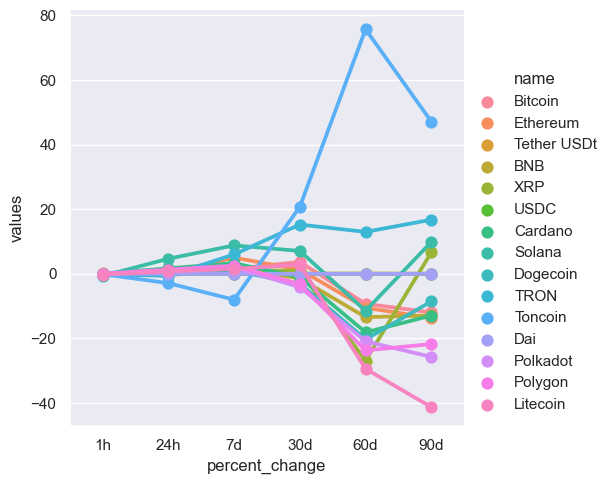

In [63]:
sns.catplot(x='percent_change',y='values',hue='name', data=df7,kind= 'point')

In [64]:
df10=df[['name','quote.USD.price','timestamp']]
df10=df10.query("name == 'Bitcoin'")
df10

,name,quote.USD.price,timestamp
0,Bitcoin,26977.536244,2023-10-01 06:37:17.568696


<Axes: xlabel='timestamp', ylabel='quote.USD.price'>

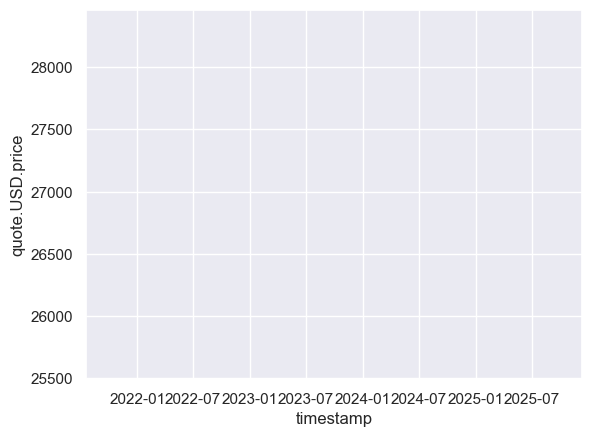

In [65]:
sns.set_theme(style="darkgrid")
sns.lineplot(x='timestamp', y='quote.USD.price', data = df10)